In [1]:
library("RcppCNPy")
library("ggplot2")
library(ggrepel)
library(dplyr)
library(tidyr)
library(ggpubr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: magrittr


Attaching package: 'magrittr'


The following object is masked from 'package:tidyr':

    extract




In [2]:
both <- as.matrix(read.table("Vanderbilt/both.run.pcangsd.analysis.cov"))

In [3]:
both.e2 <- as.matrix(read.table("Vanderbilt/both.e2.run.admix.cov"))
both.e3 <- as.matrix(read.table("Vanderbilt/both.e3.run.admix.cov"))
both.e4 <- as.matrix(read.table("Vanderbilt/both.e4.run.admix.cov"))

In [4]:

location.both <- read.table("Vanderbilt/both.run.tab", sep="\t", header=T)


In [5]:

e_both <- eigen(both)$vectors
colnames(e_both) <- colnames(both)
e_both.e2 <- eigen(both.e2)$vectors
colnames(e_both.e2) <- colnames(both.e2)
e_both.e3 <- eigen(both.e3)$vectors
colnames(e_both.e3) <- colnames(both.e3)
e_both.e4 <- eigen(both.e4)$vectors
colnames(e_both.e4) <- colnames(both.e4)

In [6]:


both_df <- data.frame(PC1=as.data.frame(e_both)$V1, 
                     PC2=as.data.frame(e_both)$V2, Sample=location.both$Sample, Location=location.both$Location, 
                            SampleName=location.both$Sample)
both_df.e2 <- data.frame(PC1=as.data.frame(e_both.e2)$V1, 
                     PC2=as.data.frame(e_both.e2)$V2, Sample=location.both$Sample, Location=location.both$Location, 
                            SampleName=location.both$Sample)
both_df.e3 <- data.frame(PC1=as.data.frame(e_both.e3)$V1, 
                     PC2=as.data.frame(e_both.e3)$V2, Sample=location.both$Sample, Location=location.both$Location, 
                            SampleName=location.both$Sample)
both_df.e4 <- data.frame(PC1=as.data.frame(e_both.e4)$V1, 
                     PC2=as.data.frame(e_both.e4)$V2, Sample=location.both$Sample, Location=location.both$Location, 
                            SampleName=location.both$Sample)

In [7]:
options(repr.plot.width = 12, repr.plot.height = 8)

In [8]:
e2 <- ggplot(both_df.e2, aes(x=PC1, y=PC2, size=1.5, color=Location, label=Location))  + geom_point() + geom_label_repel(max.overlaps=20) 

In [9]:
e3 <- ggplot(both_df.e3, aes(x=PC1, y=PC2, size=1.5, color=Location, label=Location))  + geom_point() + geom_label_repel(max.overlaps=20) 

In [10]:
e4 <- ggplot(both_df.e4, aes(x=PC1, y=PC2, size=1.5, color=Location, label=Location))  + geom_point() + geom_label_repel(max.overlaps=20) 

In [11]:
e1 <- ggplot(both_df, aes(x=PC1, y=PC2, size=1.5, color=Location, label=Location))  + geom_point() + geom_label_repel(max.overlaps=20) 

In [12]:
options(repr.plot.width = 18, repr.plot.height = 18)

Warning message:
"ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


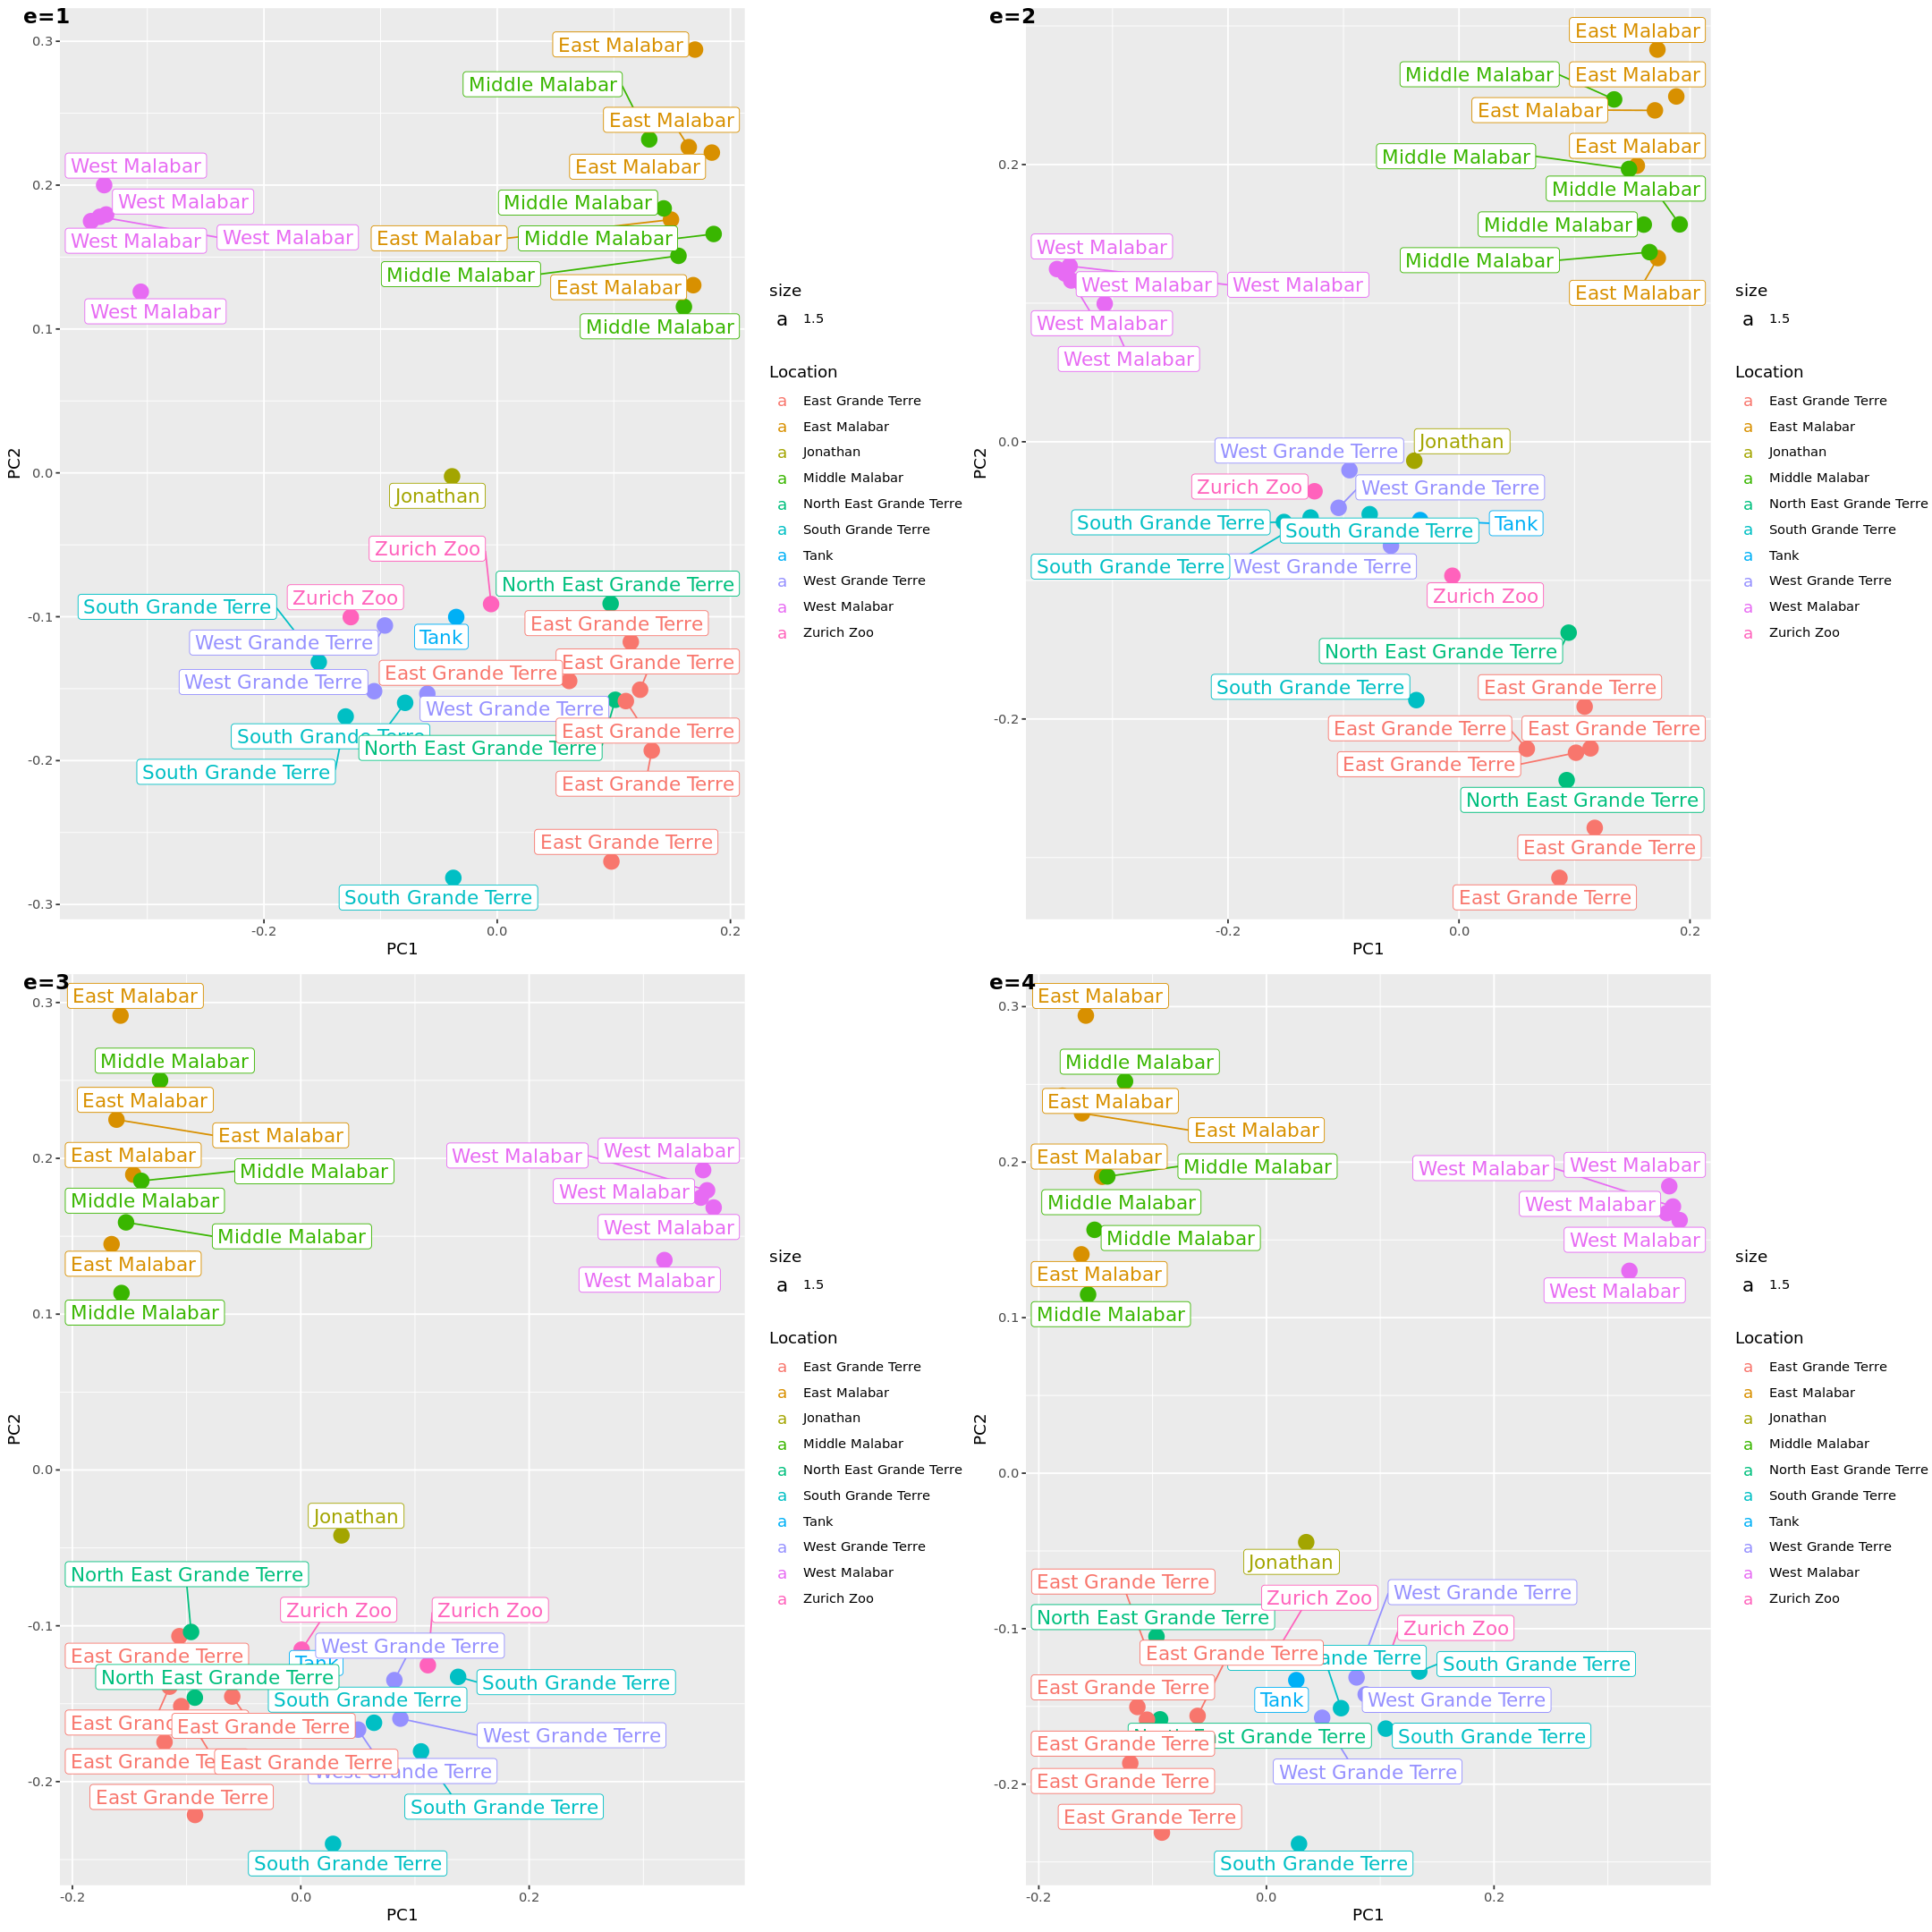

In [13]:
ggarrange(e1, e2, e3, e4, labels=c("e=1", "e=2", "e=3", "e=4"))

In [14]:
options(repr.plot.width = 12, repr.plot.height = 8)

Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Warning message:
"Removed 5 rows containing missing values (`geom_path()`)."


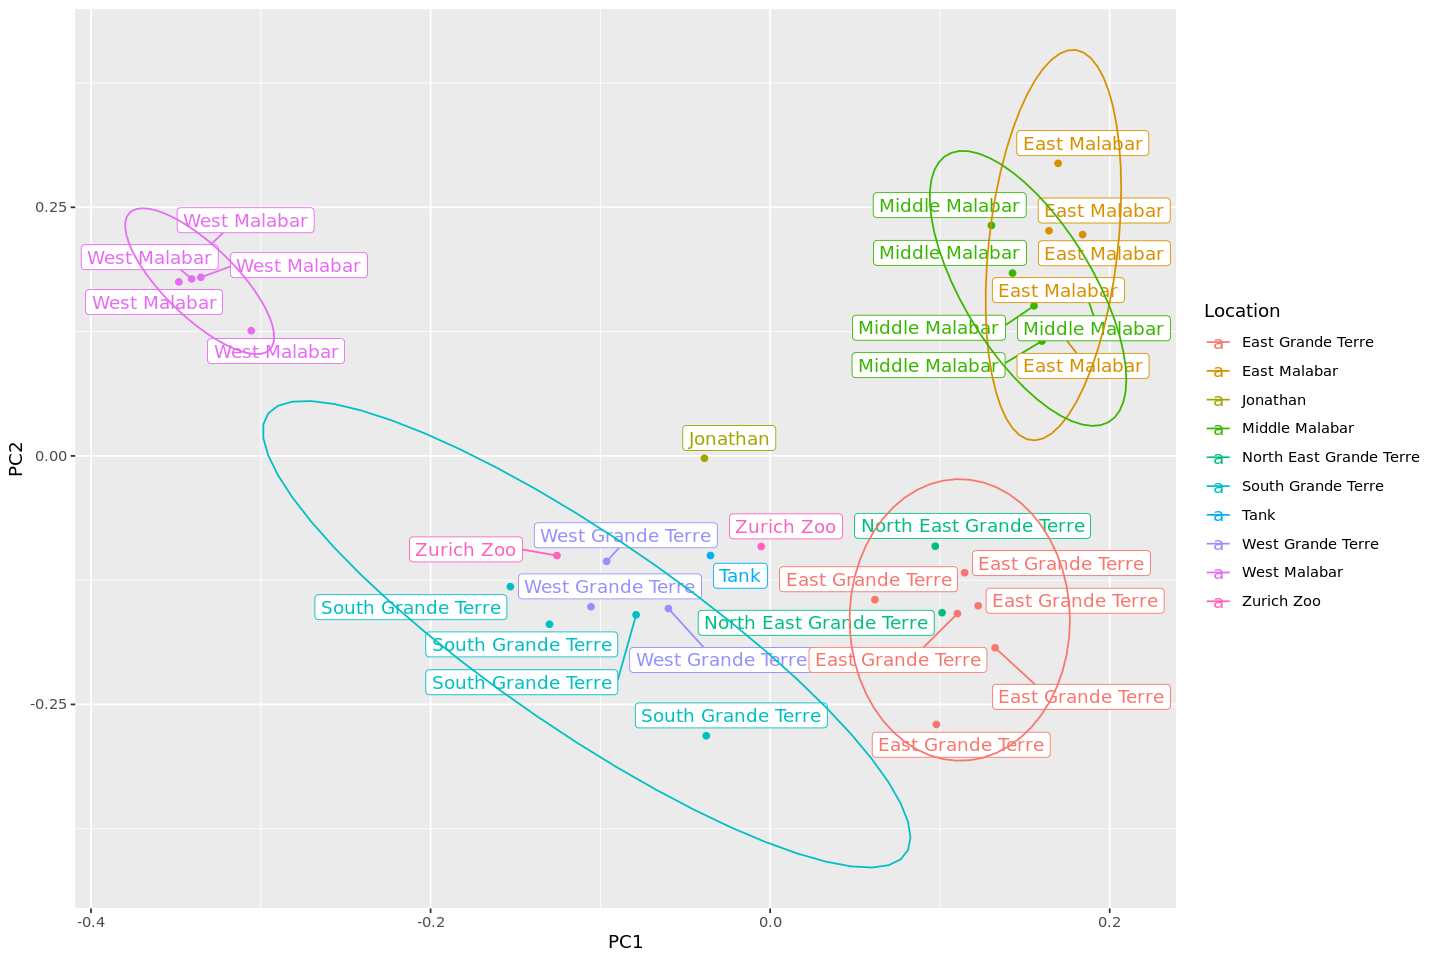

In [15]:
ggplot(both_df, aes(x=PC1, y=PC2,  color=Location, label=Location))  + geom_point() + geom_label_repel(max.overlaps=20) + stat_ellipse()

In [16]:
q <- read.table("Vanderbilt/both.run.admix.admix.2.Q")

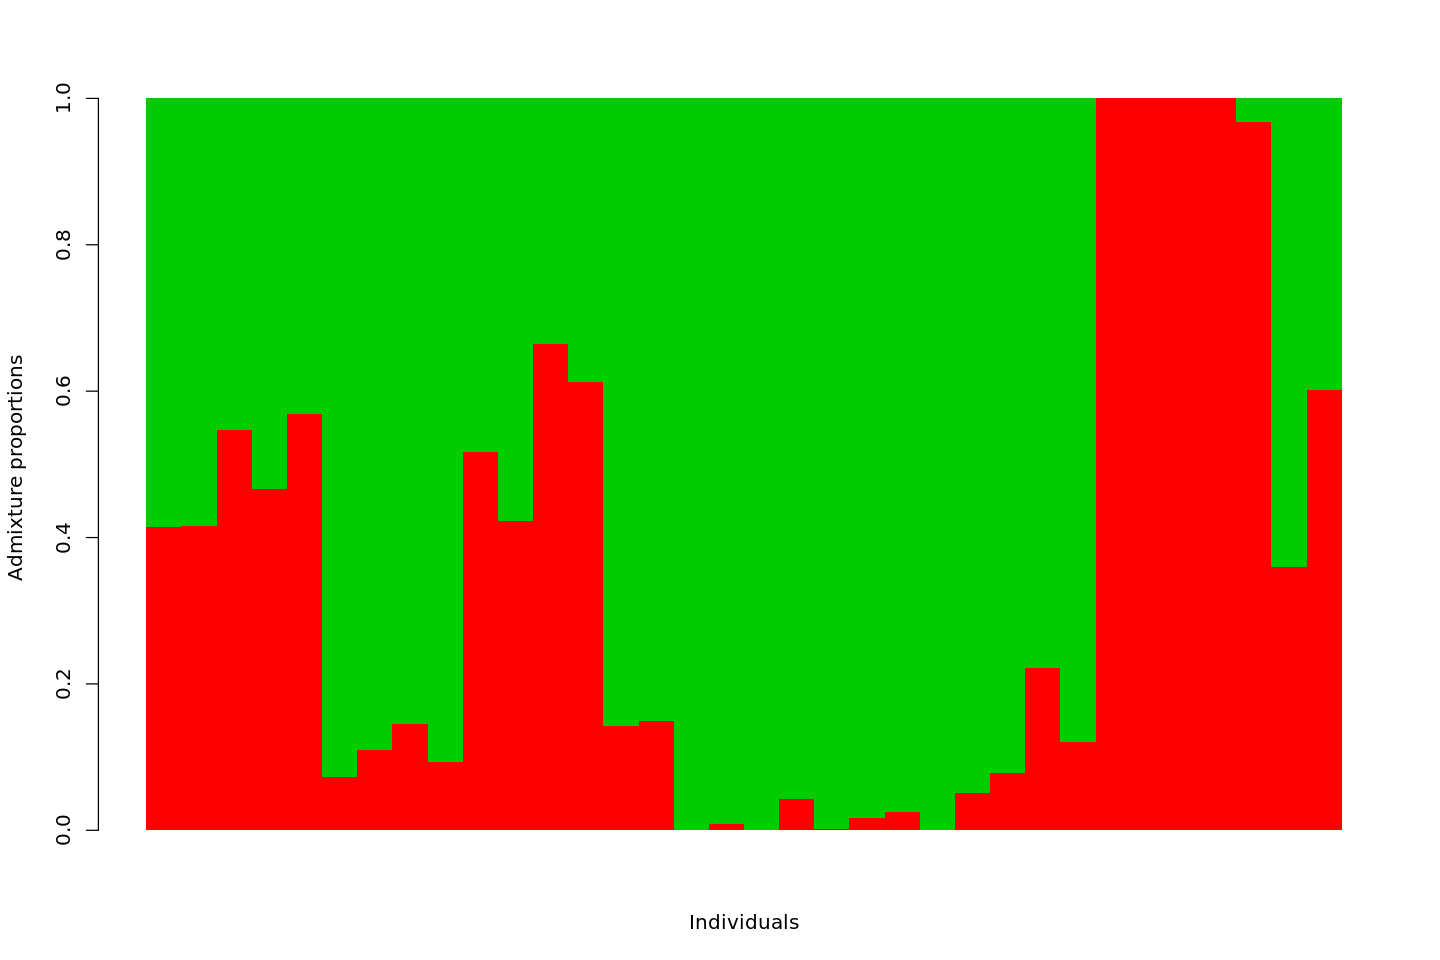

In [17]:

barplot(t(q),col=2:10,space=0,border=NA,xlab="Individuals",ylab="Admixture proportions")

In [18]:
plot_data <- cbind(q, location.both) %>% gather("pop.group", "prob", 1:2) %>% arrange(Location, Sample, pop.group)

In [19]:
plot_data

Sample,Location,pop.group,prob
<fct>,<fct>,<chr>,<dbl>
CC06,East Grande Terre,V1,0.0734192
CC06,East Grande Terre,V2,0.9265808
CC21,East Grande Terre,V1,0.1101224
CC21,East Grande Terre,V2,0.8898776
CC27,East Grande Terre,V1,0.1448353
CC27,East Grande Terre,V2,0.8551647
CC33,East Grande Terre,V1,0.0936811
CC33,East Grande Terre,V2,0.9063189
TK11,East Grande Terre,V1,0.2217854


In [20]:
options(repr.plot.width = 12, repr.plot.height = 8)

In [21]:
colors <- scale_fill_manual(values=c("darkseagreen", "darkslategray4", "deepskyblue3", "lavenderblush3", "indianred"))

In [22]:
plot_theme <- theme_minimal()  + theme(axis.title.x=element_blank(), axis.text.x=element_blank())

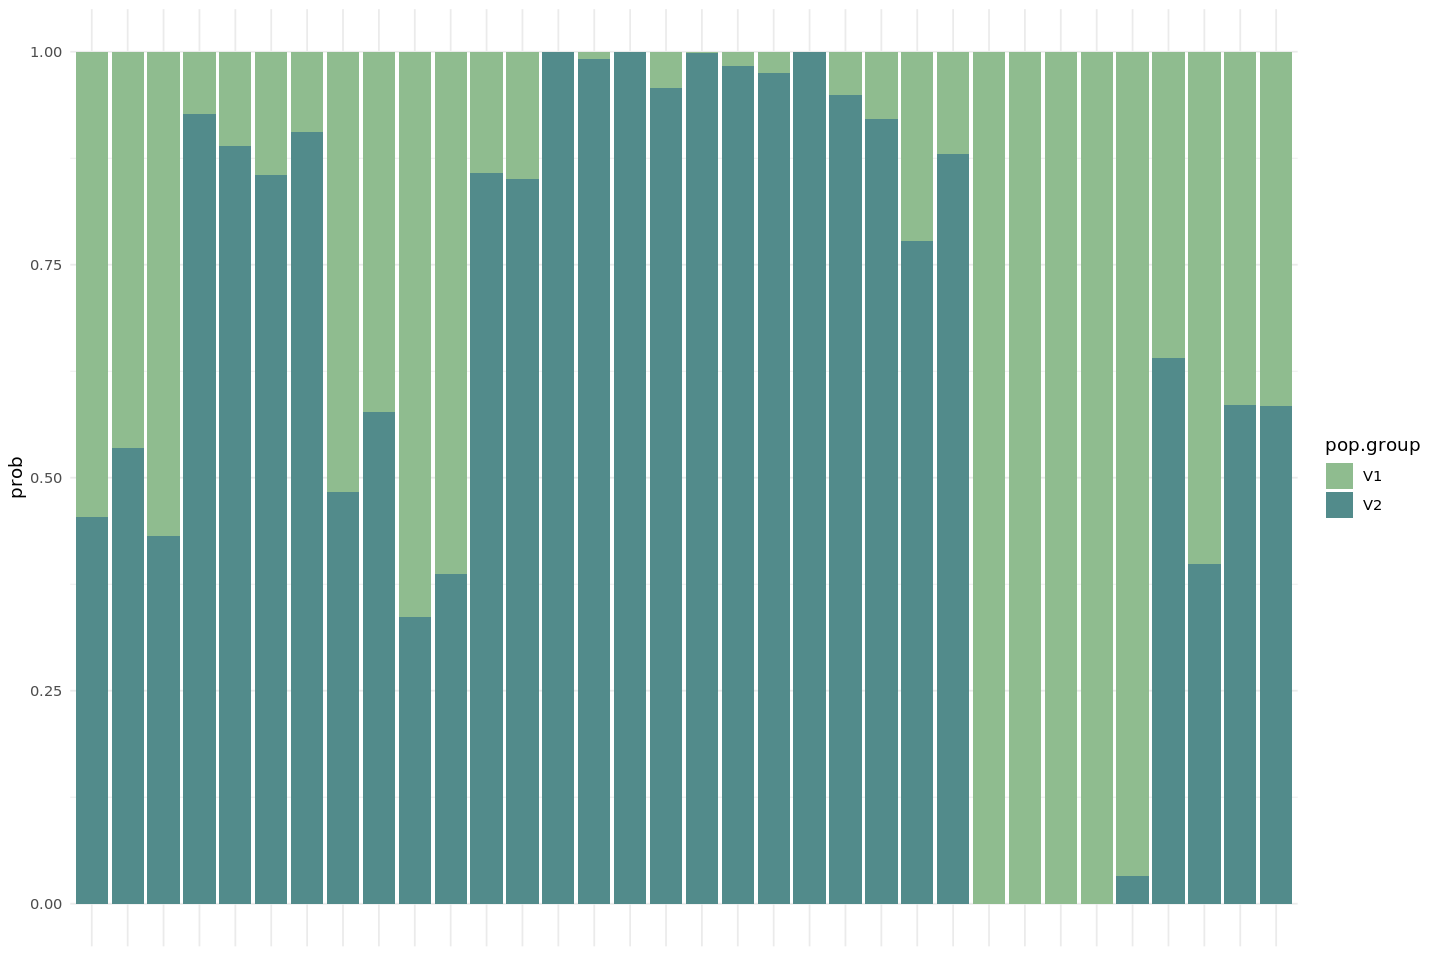

In [23]:
k2 <- ggplot(plot_data, aes(interaction(Location, Sample), prob, fill=pop.group)) + geom_col() + 
colors + plot_theme 
k2

In [24]:
q.e2 <- read.table("Vanderbilt/both.e2.run.admix.admix.3.Q")

In [25]:
plot_data.e2 <- cbind(q.e2, location.both) %>% gather("pop.group", "prob", 1:3) %>% arrange(Location, Sample, pop.group)

In [26]:
plot_data.e2

Sample,Location,pop.group,prob
<fct>,<fct>,<chr>,<dbl>
CC06,East Grande Terre,V1,0.0300557
CC06,East Grande Terre,V2,0.0000986
CC06,East Grande Terre,V3,0.9698457
CC21,East Grande Terre,V1,0.1692889
CC21,East Grande Terre,V2,0.0057509
CC21,East Grande Terre,V3,0.8249602
CC27,East Grande Terre,V1,0.0000989
CC27,East Grande Terre,V2,0.0112427
CC27,East Grande Terre,V3,0.9886585


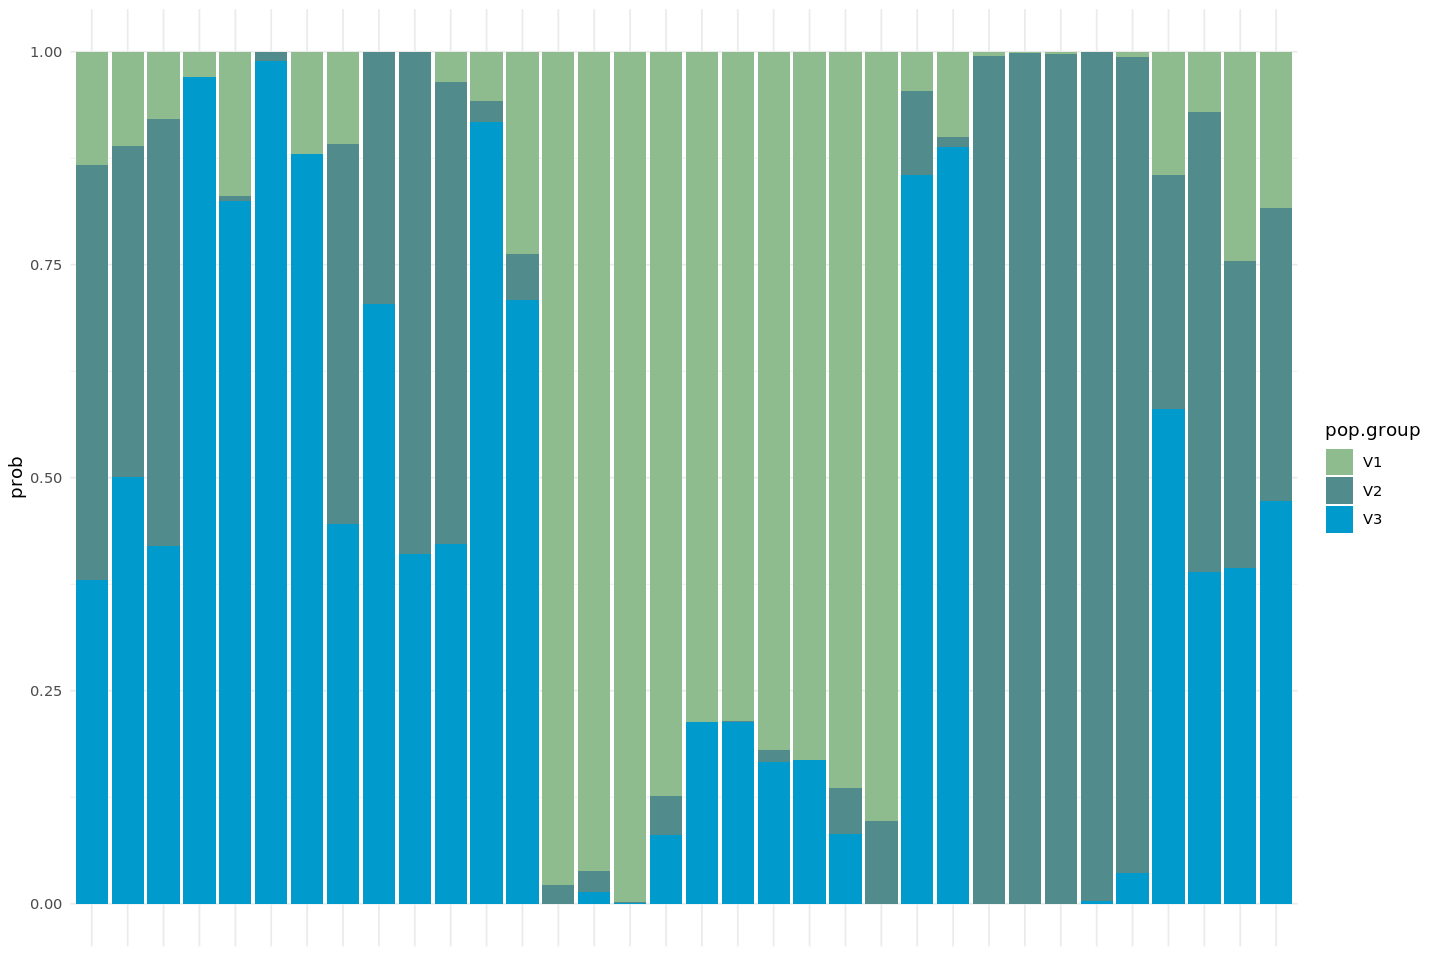

In [27]:
k3 <- ggplot(plot_data.e2, aes(interaction(Location, Sample), prob, fill=pop.group)) + geom_col() + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
colors + plot_theme
k3

In [28]:
q.e3 <- read.table("Vanderbilt/both.e3.run.admix.admix.4.Q")
plot_data.e3 <- cbind(q.e3, location.both) %>% gather("pop.group", "prob", 1:4) %>% arrange(Location, Sample, pop.group)
plot_data.e3

Sample,Location,pop.group,prob
<fct>,<fct>,<chr>,<dbl>
CC06,East Grande Terre,V1,0.0234770
CC06,East Grande Terre,V2,0.0000990
CC06,East Grande Terre,V3,0.9763249
CC06,East Grande Terre,V4,0.0000990
CC21,East Grande Terre,V1,0.1442254
CC21,East Grande Terre,V2,0.0001003
CC21,East Grande Terre,V3,0.8242048
CC21,East Grande Terre,V4,0.0314695
CC27,East Grande Terre,V1,0.0000985


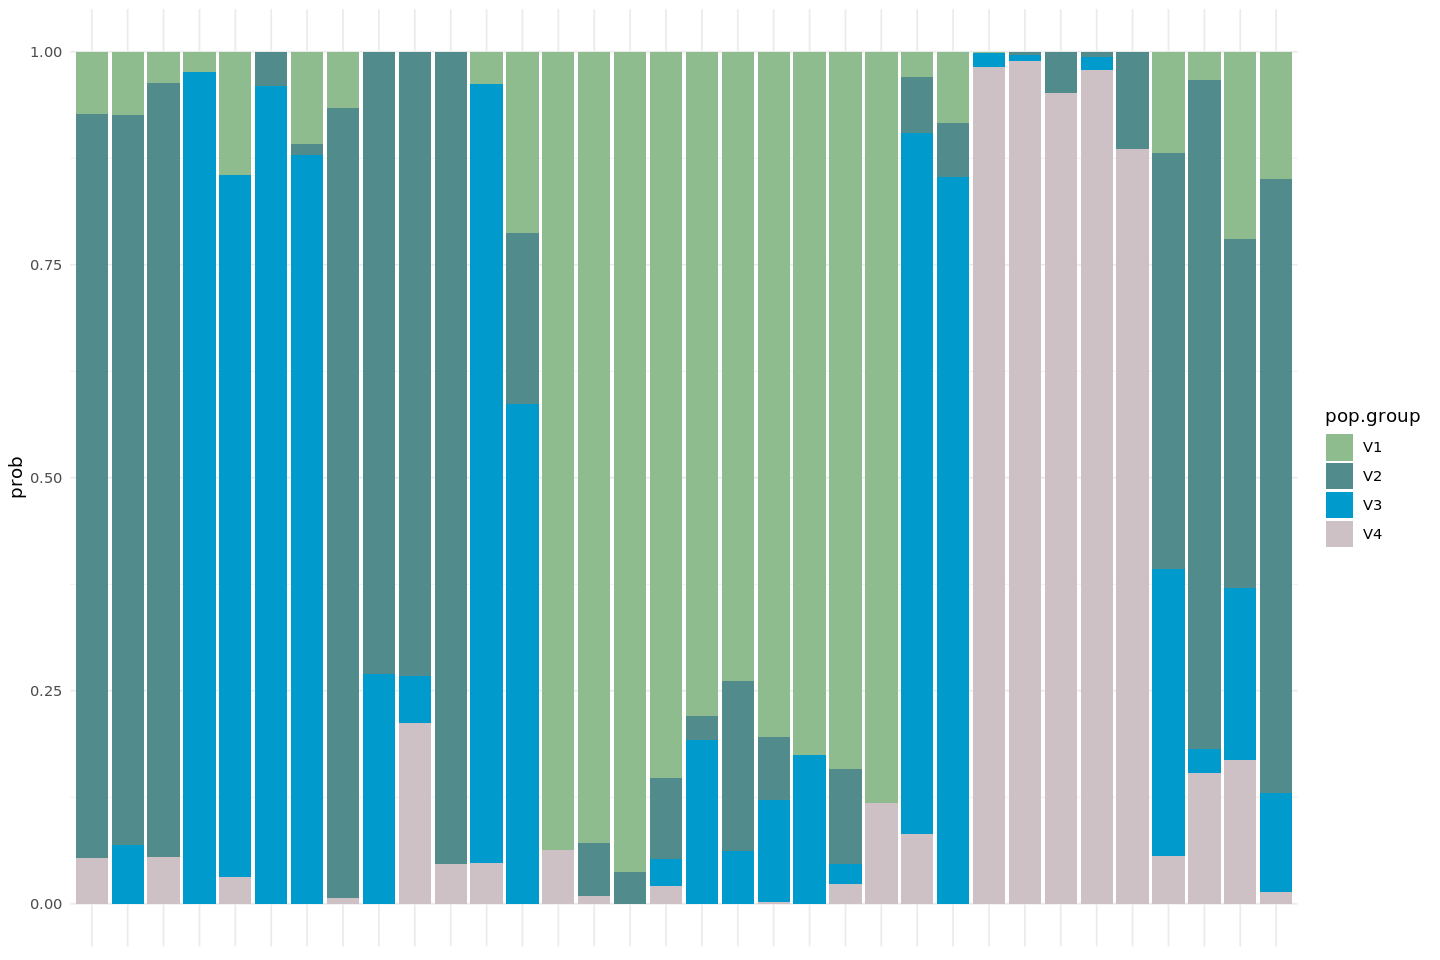

In [29]:
k4 <- ggplot(plot_data.e3, aes(interaction(Location, Sample), prob, fill=pop.group)) + geom_col() + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
colors + plot_theme
k4

In [30]:
q.e4 <- read.table("Vanderbilt/both.e4.run.admix.admix.5.Q")
plot_data.e4 <- cbind(q.e4, location.both) %>% gather("pop.group", "prob", 1:5) %>% arrange(Location, Sample, pop.group)
plot_data.e4

Sample,Location,pop.group,prob
<fct>,<fct>,<chr>,<dbl>
CC06,East Grande Terre,V1,0.9446388
CC06,East Grande Terre,V2,0.0054015
CC06,East Grande Terre,V3,0.0001000
CC06,East Grande Terre,V4,0.0497595
CC06,East Grande Terre,V5,0.0001000
CC21,East Grande Terre,V1,0.7613541
CC21,East Grande Terre,V2,0.1112743
CC21,East Grande Terre,V3,0.0000990
CC21,East Grande Terre,V4,0.0000990


In [31]:
options(repr.plot.width = 12, repr.plot.height = 8)

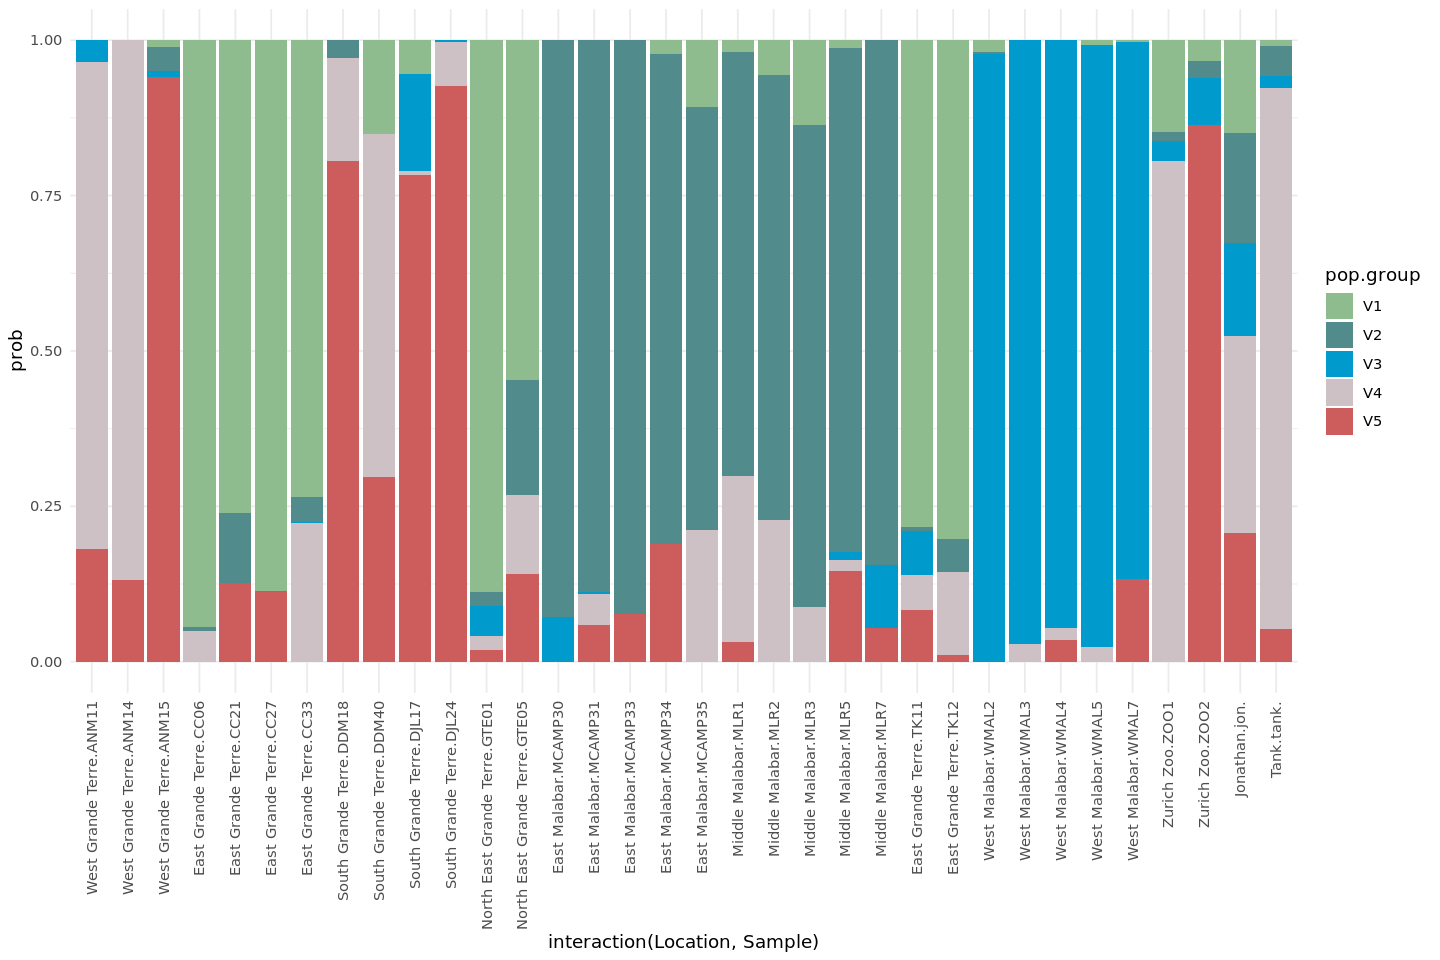

In [32]:
k5 <- ggplot(plot_data.e4, aes(interaction(Location, Sample), prob, fill=pop.group, label=Location)) + 
geom_col() + theme_minimal() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
#plot_theme +
colors
k5

In [33]:
options(repr.plot.width = 8, repr.plot.height = 12)

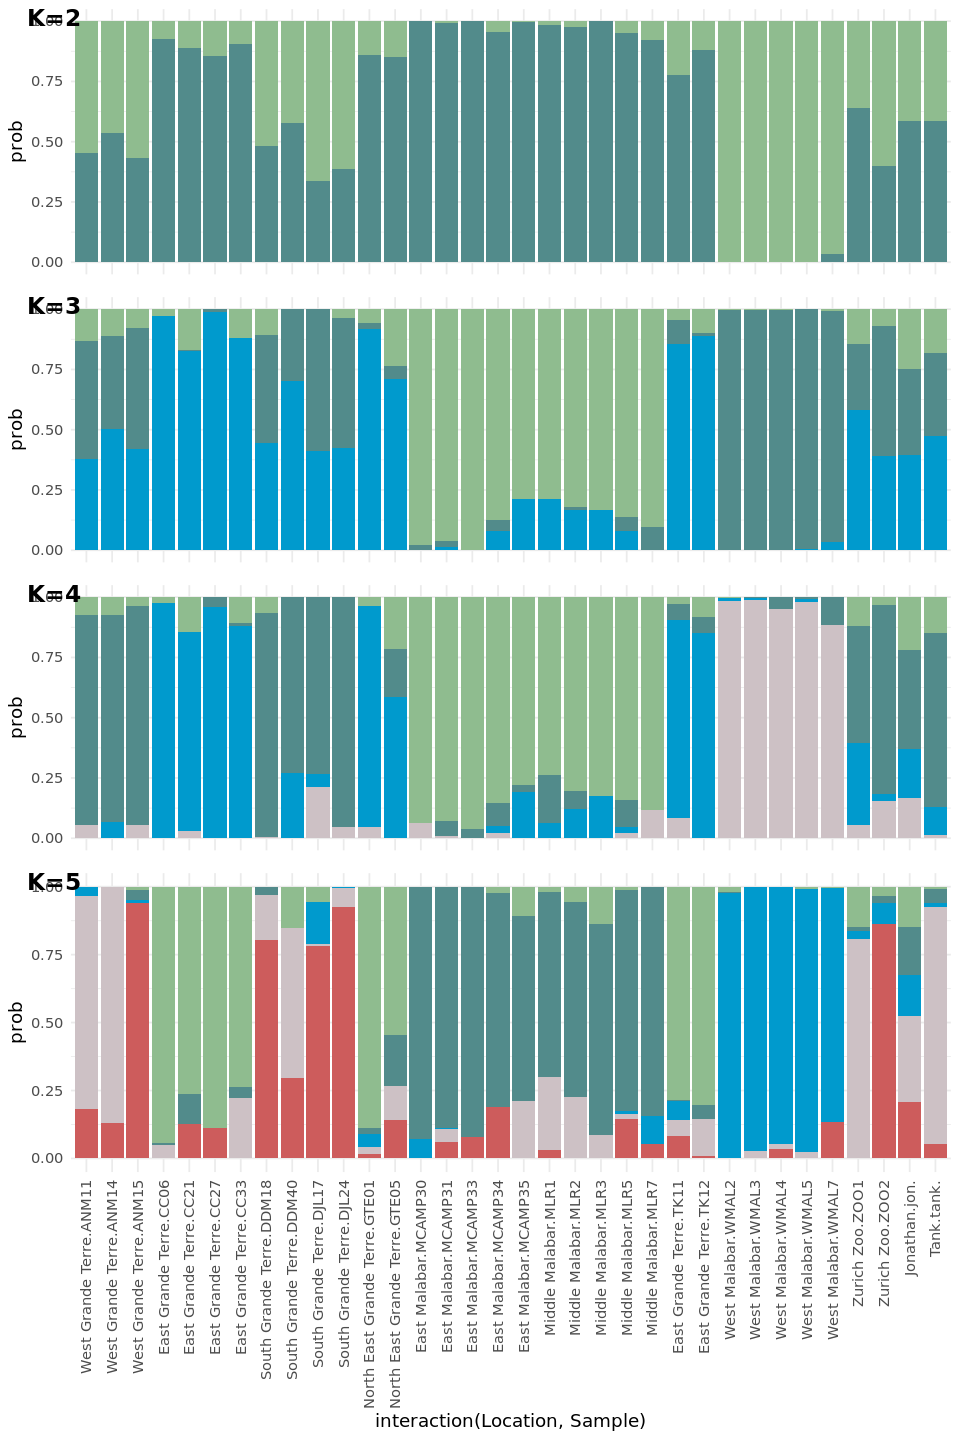

In [34]:
ggarrange(k2, k3, k4, k5, ncol=1, heights=c(1,1,1,2), labels=c("K=2", "K=3", "K=4", "K=5"), legend="none")